In [10]:
import os
import matplotlib.pyplot as plt # General plotting
import pandas as pd 
import numpy as np
import seaborn as sns # Scatterplots and Histograms


In [11]:
import sklearn
print(sklearn.__version__)

0.22.2


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
os.chdir('/gpfs/home/djs19ctu/ML_project/anage_all_data_nogen')
os.getcwd()

'/gpfs/home/djs19ctu/ML_project/anage_all_data_nogen'

In [14]:
mammal_data_filtered = pd.read_csv('mammal_data_filtered.csv')
mammal_data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
maximum longevity (yrs),970.0,19.741134,1.582603e+01,2.100,8.8250,17.0000,25.20000,2.110000e+02
adult_mass_g,970.0,519906.246910,5.904586e+06,2.365,114.6100,1756.9825,11970.97750,1.490000e+08
adult_brain_mass_g,758.0,183.077334,7.321168e+02,0.071,3.0225,18.7205,83.75000,7.818000e+03
female_maturity_d,783.0,726.249641,8.004577e+02,24.000,265.8000,440.0950,851.22500,6.391560e+03
gestation_length_d,831.0,122.623258,1.054529e+02,12.000,34.0000,88.2640,178.50000,6.696800e+02
litter_size_n,938.0,2.414329,1.884347e+00,0.950,1.0000,1.6450,3.23625,1.689000e+01
litters_per_year_n,772.0,1.564224,1.220286e+00,0.120,1.0000,1.0000,2.00000,1.000000e+01
weaning_age_d,791.0,147.184426,1.658088e+02,2.170,39.8915,84.0000,182.80800,1.112131e+03
hibernation_torpor,919.0,0.118607,3.235018e-01,0.000,0.0000,0.0000,0.00000,1.000000e+00
trophic_level,965.0,1.854922,7.821194e-01,1.000,1.0000,2.0000,2.00000,3.000000e+00


In [15]:
mammal_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order                    970 non-null    object 
 1   family                   970 non-null    object 
 2   genus                    970 non-null    object 
 3   species                  970 non-null    object 
 4   specimen origin          970 non-null    object 
 5   sample size              970 non-null    object 
 6   data quality             970 non-null    object 
 7   maximum longevity (yrs)  970 non-null    float64
 8   adult_mass_g             970 non-null    float64
 9   adult_brain_mass_g       758 non-null    float64
 10  female_maturity_d        783 non-null    float64
 11  gestation_length_d       831 non-null    float64
 12  litter_size_n            938 non-null    float64
 13  litters_per_year_n       772 non-null    float64
 14  weaning_age_d            7

# IMPUTATION OF MISSING VALUES

In [16]:
from sklearn.model_selection import train_test_split, KFold

mammal_data_filtered = pd.read_csv('mammal_data_filtered.csv')

train_mammal_data_anage, test_mammal_data_anage = train_test_split(mammal_data_filtered, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data shape: {train_mammal_data_anage.shape}")
print(f"Testing data shape: {test_mammal_data_anage.shape}")


Training data shape: (776, 23)
Testing data shape: (194, 23)


In [17]:

# Print the results
print(f"Number of unique orders training: {train_mammal_data_anage['order'].nunique()}")
print(f"Number of unique families training: {train_mammal_data_anage['family'].nunique()}")
print(f"Number of unique genera training: {train_mammal_data_anage['genus'].nunique()}")

print(f"Number of unique orders testing: {test_mammal_data_anage['order'].nunique()}")
print(f"Number of unique families testing: {test_mammal_data_anage['family'].nunique()}")
print(f"Number of unique genera testing: {test_mammal_data_anage['genus'].nunique()}")

Number of unique orders training: 22
Number of unique families training: 113
Number of unique genera training: 462
Number of unique orders testing: 17
Number of unique families testing: 70
Number of unique genera testing: 161


In [18]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define the column to encode
categorical_feature = 'order'

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder on the training data and transform
encoded_train_order = encoder.fit_transform(train_mammal_data_anage[[categorical_feature]])

# Transform the testing data using the same encoder
encoded_test_order = encoder.transform(test_mammal_data_anage[[categorical_feature]])

# Convert the encoded arrays back to DataFrames with appropriate column names
encoded_train_order_df = pd.DataFrame(
    encoded_train_order, 
    columns=encoder.get_feature_names([categorical_feature]), 
    index=train_mammal_data_anage.index
)

encoded_test_order_df = pd.DataFrame(
    encoded_test_order, 
    columns=encoder.get_feature_names([categorical_feature]), 
    index=test_mammal_data_anage.index
)

# Drop the original 'order' column and append the encoded columns
train_mammal_data_anage_encoded = pd.concat(
    [train_mammal_data_anage.drop(columns=[categorical_feature]), encoded_train_order_df], axis=1
)

test_mammal_data_anage_encoded = pd.concat(
    [test_mammal_data_anage.drop(columns=[categorical_feature]), encoded_test_order_df], axis=1
)

# Display the resulting shapes
print(f"Training data shape after encoding: {train_mammal_data_anage_encoded.shape}")
print(f"Testing data shape after encoding: {test_mammal_data_anage_encoded.shape}")


Training data shape after encoding: (776, 44)
Testing data shape after encoding: (194, 44)


In [19]:
# Get feature names for the one-hot encoded columns
order_feature_names = encoder.get_feature_names([categorical_feature])
print(order_feature_names)

['order_Afrosoricida' 'order_Carnivora' 'order_Cetartiodactyla'
 'order_Chiroptera' 'order_Cingulata' 'order_Dasyuromorphia'
 'order_Didelphimorphia' 'order_Diprotodontia' 'order_Eulipotyphla'
 'order_Hyracoidea' 'order_Lagomorpha' 'order_Macroscelidea'
 'order_Monotremata' 'order_Peramelemorphia' 'order_Perissodactyla'
 'order_Pilosa' 'order_Primates' 'order_Proboscidea' 'order_Rodentia'
 'order_Scandentia' 'order_Sirenia' 'order_Tubulidentata']


In [20]:

### I will impute variables that have less than 25% NAs.


### Before Imputing ###


# Define the features to be imputed
numeric_features = ['adult_mass_g', 'adult_brain_mass_g',
             'female_maturity_d', 'gestation_length_d',
             'litter_size_n', 'litters_per_year_n',
             'weaning_age_d']

binary_features_no_order = ['freshwater', 'marine', 'terrestrial_non-volant', 'terrestrial_volant', 'hibernation_torpor']
binary_features = binary_features_no_order + list(order_feature_names)


integer_features = ['trophic_level', 'activity_cycle', 'habitat_breadth_n']

# Separate the data

train_numeric_features = train_mammal_data_anage_encoded[numeric_features]
train_binary_features = train_mammal_data_anage_encoded[binary_features]
train_integer_features = train_mammal_data_anage_encoded[integer_features]

test_numeric_features = test_mammal_data_anage_encoded[numeric_features]
test_binary_features = test_mammal_data_anage_encoded[binary_features]
test_integer_features = test_mammal_data_anage_encoded[integer_features]

train_features = pd.concat([train_numeric_features, train_binary_features, train_integer_features], axis=1)

test_features = pd.concat([test_numeric_features, test_binary_features, test_integer_features], axis=1)

print(train_features.columns.tolist())
print(test_features.columns.tolist())


['adult_mass_g', 'adult_brain_mass_g', 'female_maturity_d', 'gestation_length_d', 'litter_size_n', 'litters_per_year_n', 'weaning_age_d', 'freshwater', 'marine', 'terrestrial_non-volant', 'terrestrial_volant', 'hibernation_torpor', 'order_Afrosoricida', 'order_Carnivora', 'order_Cetartiodactyla', 'order_Chiroptera', 'order_Cingulata', 'order_Dasyuromorphia', 'order_Didelphimorphia', 'order_Diprotodontia', 'order_Eulipotyphla', 'order_Hyracoidea', 'order_Lagomorpha', 'order_Macroscelidea', 'order_Monotremata', 'order_Peramelemorphia', 'order_Perissodactyla', 'order_Pilosa', 'order_Primates', 'order_Proboscidea', 'order_Rodentia', 'order_Scandentia', 'order_Sirenia', 'order_Tubulidentata', 'trophic_level', 'activity_cycle', 'habitat_breadth_n']
['adult_mass_g', 'adult_brain_mass_g', 'female_maturity_d', 'gestation_length_d', 'litter_size_n', 'litters_per_year_n', 'weaning_age_d', 'freshwater', 'marine', 'terrestrial_non-volant', 'terrestrial_volant', 'hibernation_torpor', 'order_Afrosori

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define the RandomForestRegressor for imputation
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize IterativeImputer with the RandomForestRegressor
rf_imputer = IterativeImputer(estimator=rf_regressor, random_state=42)

# Use all features (numeric, binary, and integer) for imputation
all_features = numeric_features + binary_features + integer_features

# Apply imputation on the combined training data
train_features_imputed_all = rf_imputer.fit_transform(train_features[all_features])
test_features_imputed_all = rf_imputer.transform(test_features[all_features])

# Convert imputed arrays back to DataFrames with original column names
train_features_imputed_all = pd.DataFrame(train_features_imputed_all, columns=all_features)
test_features_imputed_all = pd.DataFrame(test_features_imputed_all, columns=all_features)

### Separate and Round Features as Needed ###

# Extract and round only `binary_features_no_order` for the final dataset
train_binary_features_imputed = train_features_imputed_all[binary_features_no_order].round().astype(int)
test_binary_features_imputed = test_features_imputed_all[binary_features_no_order].round().astype(int)

# Extract and round integer features
train_integer_features_imputed = train_features_imputed_all[integer_features].round().astype(int)
test_integer_features_imputed = test_features_imputed_all[integer_features].round().astype(int)

# Keep numeric features as they are
train_numeric_features_imputed = train_features_imputed_all[numeric_features]
test_numeric_features_imputed = test_features_imputed_all[numeric_features]

# Combine back into final imputed datasets for train and test
train_features_imputed_nogen = pd.concat([train_numeric_features_imputed, train_binary_features_imputed, train_integer_features_imputed], axis=1)
test_features_imputed_nogen = pd.concat([test_numeric_features_imputed, test_binary_features_imputed, test_integer_features_imputed], axis=1)

# Display summaries for verification
print("Train Features Imputed Summary:\n", train_features_imputed_nogen.describe().T)
print("\nTest Features Imputed Summary:\n", test_features_imputed_nogen.describe().T)


Train Features Imputed Summary:
                         count           mean           std     min        25%  \
adult_mass_g            776.0  553315.199063  6.411582e+06   2.365  113.30000   
adult_brain_mass_g      776.0     182.601653  7.420179e+02   0.071    1.88517   
female_maturity_d       776.0     681.475995  7.581352e+02  29.980  273.44300   
gestation_length_d      776.0     115.295250  1.010459e+02  12.000   32.99750   
litter_size_n           776.0       2.454003  1.881835e+00   0.950    1.00000   
litters_per_year_n      776.0       1.573449  1.122660e+00   0.120    1.00000   
weaning_age_d           776.0     137.420766  1.495388e+02   2.170   40.61475   
freshwater              776.0       0.046392  2.104677e-01   0.000    0.00000   
marine                  776.0       0.059278  2.362972e-01   0.000    0.00000   
terrestrial_non-volant  776.0       0.864691  3.422742e-01   0.000    1.00000   
terrestrial_volant      776.0       0.094072  2.921174e-01   0.000    0.0000

In [22]:
train_features_imputed_nogen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   adult_mass_g            776 non-null    float64
 1   adult_brain_mass_g      776 non-null    float64
 2   female_maturity_d       776 non-null    float64
 3   gestation_length_d      776 non-null    float64
 4   litter_size_n           776 non-null    float64
 5   litters_per_year_n      776 non-null    float64
 6   weaning_age_d           776 non-null    float64
 7   freshwater              776 non-null    int64  
 8   marine                  776 non-null    int64  
 9   terrestrial_non-volant  776 non-null    int64  
 10  terrestrial_volant      776 non-null    int64  
 11  hibernation_torpor      776 non-null    int64  
 12  trophic_level           776 non-null    int64  
 13  activity_cycle          776 non-null    int64  
 14  habitat_breadth_n       776 non-null    in

# COMBINE IMPUTED AND NONIMPUTED DATA AS A DATAFRAME

In [29]:
# Combine all the imputed data with the non-imputed categorical features and max_longevity_d

categorical_features = ['order', 'family', 'genus', 'species']

train_categorical_data = train_mammal_data_anage[categorical_features]
train_max_specimen_origin = train_mammal_data_anage['specimen origin']
train_max_sample_size = train_mammal_data_anage['sample size']
train_max_data_quality = train_mammal_data_anage['data quality']
train_max_longevity_yrs = train_mammal_data_anage['maximum longevity (yrs)']

test_categorical_data = test_mammal_data_anage[categorical_features]
test_max_specimen_origin = test_mammal_data_anage['specimen origin']
test_max_sample_size = test_mammal_data_anage['sample size']
test_max_data_quality = test_mammal_data_anage['data quality']
test_max_longevity_yrs = test_mammal_data_anage['maximum longevity (yrs)']

train_mammal_data_imputed_nogen = pd.concat([train_categorical_data.reset_index(drop=True),
                                 train_features_imputed_nogen,
                                 train_max_specimen_origin.reset_index(drop=True),
                                train_max_sample_size.reset_index(drop=True),
                                train_max_data_quality.reset_index(drop=True),
                                train_max_longevity_yrs.reset_index(drop=True)], axis=1)

# Check if there are any missing values left
print(train_mammal_data_imputed_nogen.isna().sum())

test_mammal_data_imputed_nogen = pd.concat([test_categorical_data.reset_index(drop=True),
                                 test_features_imputed_nogen,
                                test_max_specimen_origin.reset_index(drop=True),
                                test_max_sample_size.reset_index(drop=True),
                               test_max_data_quality.reset_index(drop=True),
                                test_max_longevity_yrs.reset_index(drop=True)], axis=1)

# Check if there are any missing values left
print(test_mammal_data_imputed_nogen.isna().sum())

# Display the imputed DataFrame

train_mammal_data_imputed_nogen.to_csv('train_mammal_data_imputed_nogen.csv', index=False)

# Display the imputed DataFrame

test_mammal_data_imputed_nogen.to_csv('test_mammal_data_imputed_nogen.csv', index=False)


order                      0
family                     0
genus                      0
species                    0
adult_mass_g               0
adult_brain_mass_g         0
female_maturity_d          0
gestation_length_d         0
litter_size_n              0
litters_per_year_n         0
weaning_age_d              0
freshwater                 0
marine                     0
terrestrial_non-volant     0
terrestrial_volant         0
hibernation_torpor         0
trophic_level              0
activity_cycle             0
habitat_breadth_n          0
specimen origin            0
sample size                0
data quality               0
maximum longevity (yrs)    0
dtype: int64
order                      0
family                     0
genus                      0
species                    0
adult_mass_g               0
adult_brain_mass_g         0
female_maturity_d          0
gestation_length_d         0
litter_size_n              0
litters_per_year_n         0
weaning_age_d              0
f

In [30]:
# Combine train and test datasets into a single main imputed dataset
mammal_data_imputed_nogen = pd.concat([train_mammal_data_imputed_nogen, test_mammal_data_imputed_nogen], axis=0).reset_index(drop=True)

# Check if there are any missing values left
print(mammal_data_imputed_nogen.isna().sum())

# Save the main imputed dataset to a CSV file
mammal_data_imputed_nogen.to_csv('mammal_data_imputed_nogen.csv', index=False)

# Display the first few rows for verification
print(mammal_data_imputed_nogen.head())

order                      0
family                     0
genus                      0
species                    0
adult_mass_g               0
adult_brain_mass_g         0
female_maturity_d          0
gestation_length_d         0
litter_size_n              0
litters_per_year_n         0
weaning_age_d              0
freshwater                 0
marine                     0
terrestrial_non-volant     0
terrestrial_volant         0
hibernation_torpor         0
trophic_level              0
activity_cycle             0
habitat_breadth_n          0
specimen origin            0
sample size                0
data quality               0
maximum longevity (yrs)    0
dtype: int64
       order      family      genus      species  adult_mass_g  \
0   Rodentia  Cricetidae   Phodopus  roborovskii         12.02   
1  Carnivora  Mephitidae  Conepatus   leuconotus       2645.29   
2  Carnivora  Viverridae    Viverra   tangalunga       7349.99   
3  Carnivora  Mustelidae    Mustela     nigripes        

In [31]:

print(train_mammal_data_imputed_nogen.columns.tolist())
print(test_mammal_data_imputed_nogen.columns.tolist())


['order', 'family', 'genus', 'species', 'adult_mass_g', 'adult_brain_mass_g', 'female_maturity_d', 'gestation_length_d', 'litter_size_n', 'litters_per_year_n', 'weaning_age_d', 'freshwater', 'marine', 'terrestrial_non-volant', 'terrestrial_volant', 'hibernation_torpor', 'trophic_level', 'activity_cycle', 'habitat_breadth_n', 'specimen origin', 'sample size', 'data quality', 'maximum longevity (yrs)']
['order', 'family', 'genus', 'species', 'adult_mass_g', 'adult_brain_mass_g', 'female_maturity_d', 'gestation_length_d', 'litter_size_n', 'litters_per_year_n', 'weaning_age_d', 'freshwater', 'marine', 'terrestrial_non-volant', 'terrestrial_volant', 'hibernation_torpor', 'trophic_level', 'activity_cycle', 'habitat_breadth_n', 'specimen origin', 'sample size', 'data quality', 'maximum longevity (yrs)']


In [ ]:
# When I check 'specimen origin', 'sample size', 'data quality' I see that only in humans the sample size if "huge"
# I convert huge to large because one sample is not helping the prediction!

In [33]:

# Load the dataset
mammal_data_imputed_nogen = pd.read_csv("mammal_data_imputed_nogen.csv")

# Replace 'huge' with 'large' in the 'sample size' column
mammal_data_imputed_nogen["sample size"] = mammal_data_imputed_nogen["sample size"].replace("huge", "large")

# Save the modified dataset
mammal_data_imputed_nogen.to_csv("mammal_data_imputed_nogen.csv", index=False)


In [35]:
# Load the dataset
train_mammal_data_imputed_nogen = pd.read_csv("train_mammal_data_imputed_nogen.csv")

# Replace 'huge' with 'large' in the 'sample size' column
train_mammal_data_anage_imputed["sample size"] = train_mammal_data_anage_imputed["sample size"].replace("huge", "large")

# Save the modified dataset
train_mammal_data_anage_imputed.to_csv("train_mammal_data_imputed.csv", index=False)

In [36]:
# Show unique levels of categorical columns in train dataset
print("Train Data Levels:")
print("Specimen origin:", train_mammal_data_anage_imputed["specimen origin"].unique())
print("Sample size:", train_mammal_data_anage_imputed["sample size"].unique())
print("Data quality:", train_mammal_data_anage_imputed["data quality"].unique())

# Show unique levels of categorical columns in test dataset
print("\nTest Data Levels:")
print("Specimen origin:", test_mammal_data_anage_imputed["specimen origin"].unique())
print("Sample size:", test_mammal_data_anage_imputed["sample size"].unique())
print("Data quality:", test_mammal_data_anage_imputed["data quality"].unique())


Train Data Levels:
Specimen origin: ['captivity' 'wild' 'unknown']
Sample size: ['medium' 'tiny' 'small' 'large']
Data quality: ['acceptable' 'questionable' 'high']

Test Data Levels:
Specimen origin: ['captivity' 'wild' 'unknown']
Sample size: ['small' 'tiny' 'medium' 'large']
Data quality: ['acceptable' 'high' 'questionable']


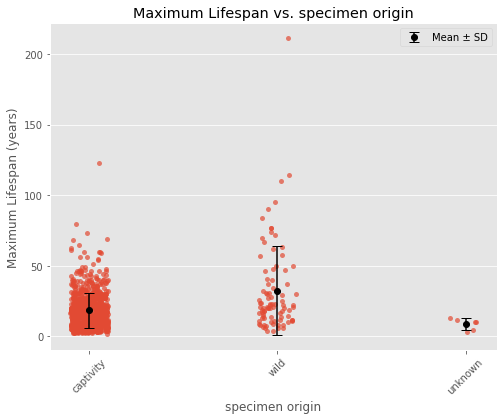

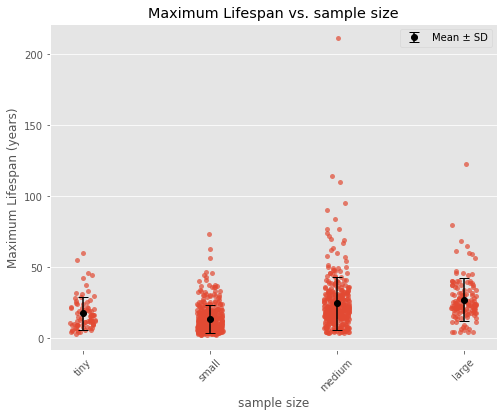

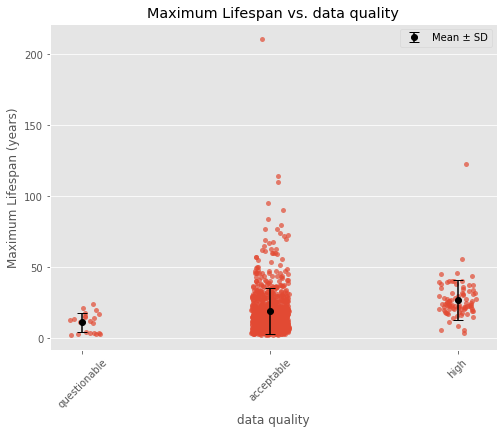

In [37]:

# Set plot style
plt.style.use("ggplot")

# Define the categorical features and their order
categorical_order = {"specimen origin": ['captivity', 'wild', 'unknown'],
    "sample size": ["tiny", "small", "medium", "large", "huge"],
    "data quality": ["questionable", "acceptable", "high"]
}

# Create dot plots with standard deviation bars for each categorical feature
for feature in ["specimen origin", "sample size", "data quality"]:
    plt.figure(figsize=(8, 6))

    # Define order if applicable
    order = categorical_order.get(feature, None)

    # Compute means and standard deviations
    grouped = mammal_data_imputed_nogen.groupby(feature)["maximum longevity (yrs)"]
    means = grouped.mean()
    std_devs = grouped.std()

    # Plot the dot plot (strip plot)
    sns.stripplot(x=mammal_data_imputed_nogen[feature],
                  y=mammal_data_imputed_nogen["maximum longevity (yrs)"],
                  order=order,
                  jitter=True,
                  size=5,
                  alpha=0.7,
                  zorder=2)

    # Overlay standard deviation as error bars
    plt.errorbar(means.index, means, yerr=std_devs, fmt='o', color='black', capsize=5, label='Mean ± SD')

    plt.xlabel(feature)
    plt.ylabel("Maximum Lifespan (years)")
    plt.title(f"Maximum Lifespan vs. {feature}")
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.legend()
    plt.show()


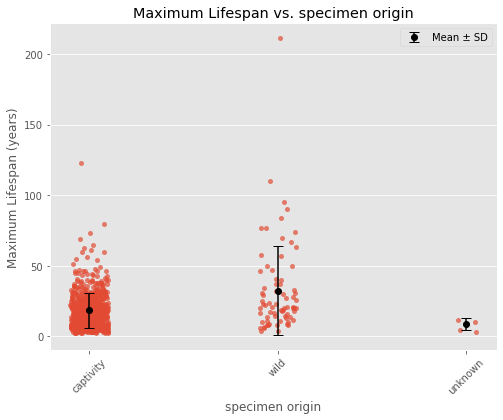

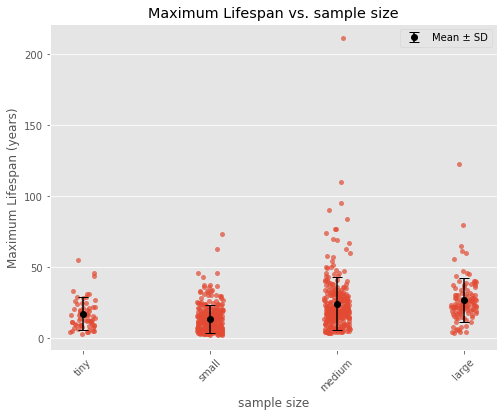

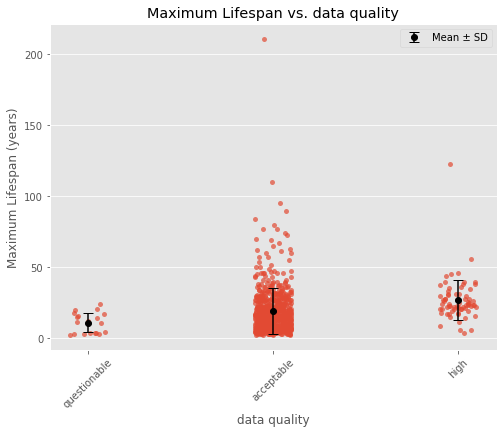

In [60]:
# Set plot style
plt.style.use("ggplot")

# Define the categorical features and their order
categorical_order = {"specimen origin": ['captivity', 'wild', 'unknown'],
    "sample size": ["tiny", "small", "medium", "large", "huge"],
    "data quality": ["questionable", "acceptable", "high"]
}

# Create dot plots with standard deviation bars for each categorical feature
for feature in ["specimen origin", "sample size", "data quality"]:
    plt.figure(figsize=(8, 6))

    # Define order if applicable
    order = categorical_order.get(feature, None)

    # Compute means and standard deviations
    grouped = mammal_data_anage_imputed.groupby(feature)["maximum longevity (yrs)"]
    means = grouped.mean()
    std_devs = grouped.std()

    # Plot the dot plot (strip plot)
    sns.stripplot(x=train_mammal_data_anage_imputed[feature],
                  y=train_mammal_data_anage_imputed["maximum longevity (yrs)"],
                  order=order,
                  jitter=True,
                  size=5,
                  alpha=0.7,
                  zorder=2)

    # Overlay standard deviation as error bars
    plt.errorbar(means.index, means, yerr=std_devs, fmt='o', color='black', capsize=5, label='Mean ± SD')

    plt.xlabel(feature)
    plt.ylabel("Maximum Lifespan (years)")
    plt.title(f"Maximum Lifespan vs. {feature}")
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.legend()
    plt.show()